# ScheduledFlows

## Overview
The idea of this module is to create an emissions scenario -- a _schedule_ -- that says how much carbon humans put  into the atmosphere in the past, and make projections about future emissions. 

## Mathematical background
The emissions scenario generated here has the form 

$$
\epsilon(t) = {exp(kt) \ \sigma_{down}(t)} \ N   \ \ \ \ \ (1)
$$

where $\epsilon$ is understood to be a rate of emission of carbon into the atmosphere, on a per-year basis, as a function of time, $t$. Let's take this formula apart piece by piece ...

### Exponential growth in the early years
The first term, $exp(kt)$ describes exponential growth. This kind of growth is always parameterized by a growth rate, here given by $k$. Part of your job will be to find a reasonable value for $k$, but a good guess is to say that in the last few hundred years, anthropogenic emissions of fossil fuels grew at about the same exponential rate as human population growth, which was roughly $2.5%$ per year, which would correspond to $k=0.025 \ yr^{-1}$. 

### Decarbonization by a step-down sigmoid function
The next term is a step-down sigmoid function, $\sigma_{down}$. This function describes humanity's decarbonization transition. How? Well, it's centered around a _transition year_, $t_{trans}$. Long before the transition year, $\sigma_{down}=1$, whereas long afterward, $\sigma_{down}=0$. When $t=t_{trans}$, $\sigma_{down}={1\over2}$, which means decarbonization is halfway complete. 

You might guess that $\sigma_{down}$ requires one more parameter, which concerns how _fast_ the transition occurs. This is specified by a _transition time interval_, $\Delta t_{trans}$, which is about the time it takes for $\sigma_{down}$ to get from $0.8$ to $0.2$ (the "80/20" rule). 

In the example below, we've set $t_{trans}$ and $\Delta t_{trans}$ to default values, but part of your job will be to choose your own values for these parameters.

### Pegging
The $N$ in Eq. (1) provides us a way to fix our emissions model so that it's guaranteed to be correct at a least at one year (of our choosing). This is called "pegging." It's convenient to say 

$$
N = {\epsilon_o \over {exp(kt_o) \ \sigma_{down}(t_o)}}   \ \ \ \ \ (2)
$$

where the pegged year is specified by $t_o$, and the emissions we want to be sure about that year is specified by $\epsilon_o$. In the example below, we've specified some default values, but part of your job will be to find a reasonable and defensible range of values to peg.

By the way, with a little mathematical reflection, you'll probably see that this pegging strategy works for any choice of the growth rate, $k$. That's pretty handy because it means that even if we happen to choose an unrealistic value for $k$, we'll still get the right emission in one particular year -- the pegged year, $t_o$!

### Metadata and modularization
Part of good coding practice is finding ways to save data in a way that is "self-documenting." Like, including the units of your data, or other parameters. Fortunately, a combination of Python's _Pandas_ package, with a built-in feature called _dictionaries_, we can do all that. So we'll be learning a bit about _Pandas_ and _dictionaries_ too.

Another part of good coding practice is to find ways to re-use code. Here, you'll be doing that using Python _functions_.

## Computing skills

- I can set up functions in python, and am familiar with methodolgies for ensuring they are working.
- I can use pandas and dictionaries to write data and associated metadata to a file.

## Climate science skills

- I can describe how exponential growth is represented mathematically.
- I can describe how a sigmoid (step) function is represented mathematically.
- I have a quantitative sense of past carbon emissions.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5io

In [3]:
%matplotlib notebook

### Parameters
The parameters below are supplied as default values, but by the time you're finished you should revisit this cell and change them to what you want.

In [4]:
# Frst lay out an array of times
t_start = 2000
t_stop = 2060
nsteps = 1000
t = np.linspace(t_start,t_stop,nsteps)

# Parameter for exponential growth
k = 0.025

# Transition year and transition time interval for the sigmoid function
t_trans = 2040
delta_t_trans = 20

# Parameters for pegging
t_0 = 2020
eps_0 = 14

### BEGIN SOLUTION
final_runthrough = True
if final_runthrough:
    t_start = 1750
    t_stop = 2250
    t = np.linspace(t_start,t_stop,nsteps)
    t_trans = 2035
    delta_t_trans = 20
    t_0 = 2020
    eps_0 = 14
### END SOLUTION

### Exponential growth
In the cell below, we've coded up a couple of exponential growth curves. Pretty shocking just a tenth of a percentage point makes (going from 2.2% to 2.3%) makes, isn't it?

<IPython.core.display.Javascript object>


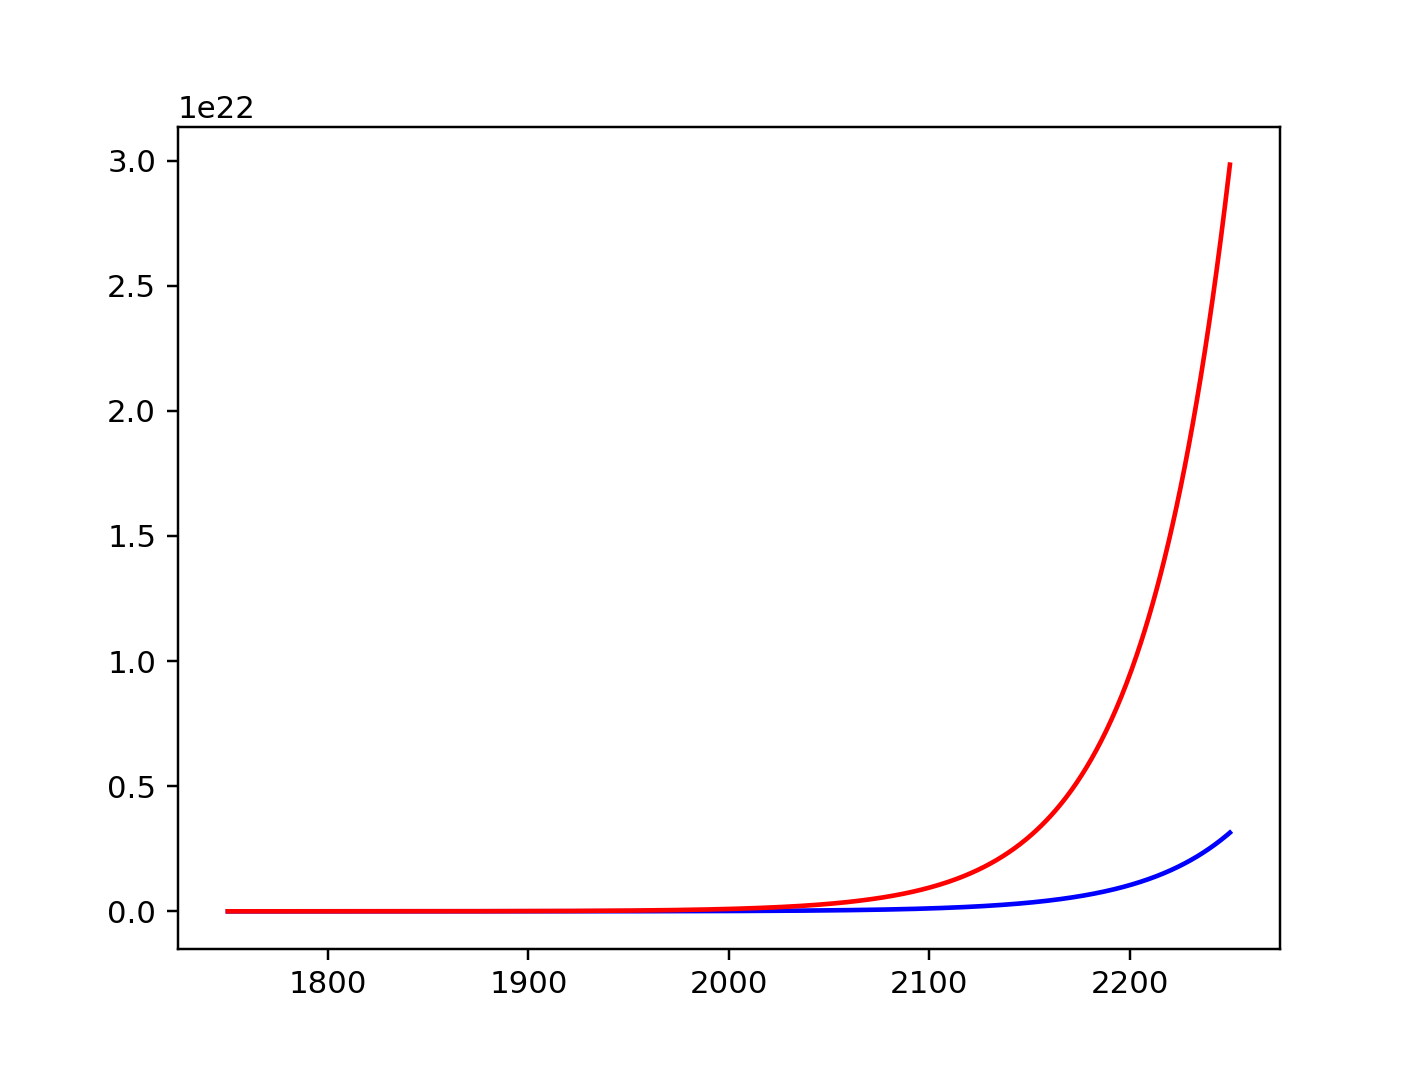

In [5]:
k1 = 0.022
k2 = 0.023
myexp1 = np.exp(k1*t)
myexp2 = np.exp(k2*t)
plt.figure()
plt.plot(t,myexp1,'blue')
plt.plot(t,myexp2,'red')

### Your turn
In the cell below, construct an exponential growth curve using the parameter $k$, and name the resulting array "myexp". Plot myexp as a function of time (t) to make sure it looks OK.

<IPython.core.display.Javascript object>


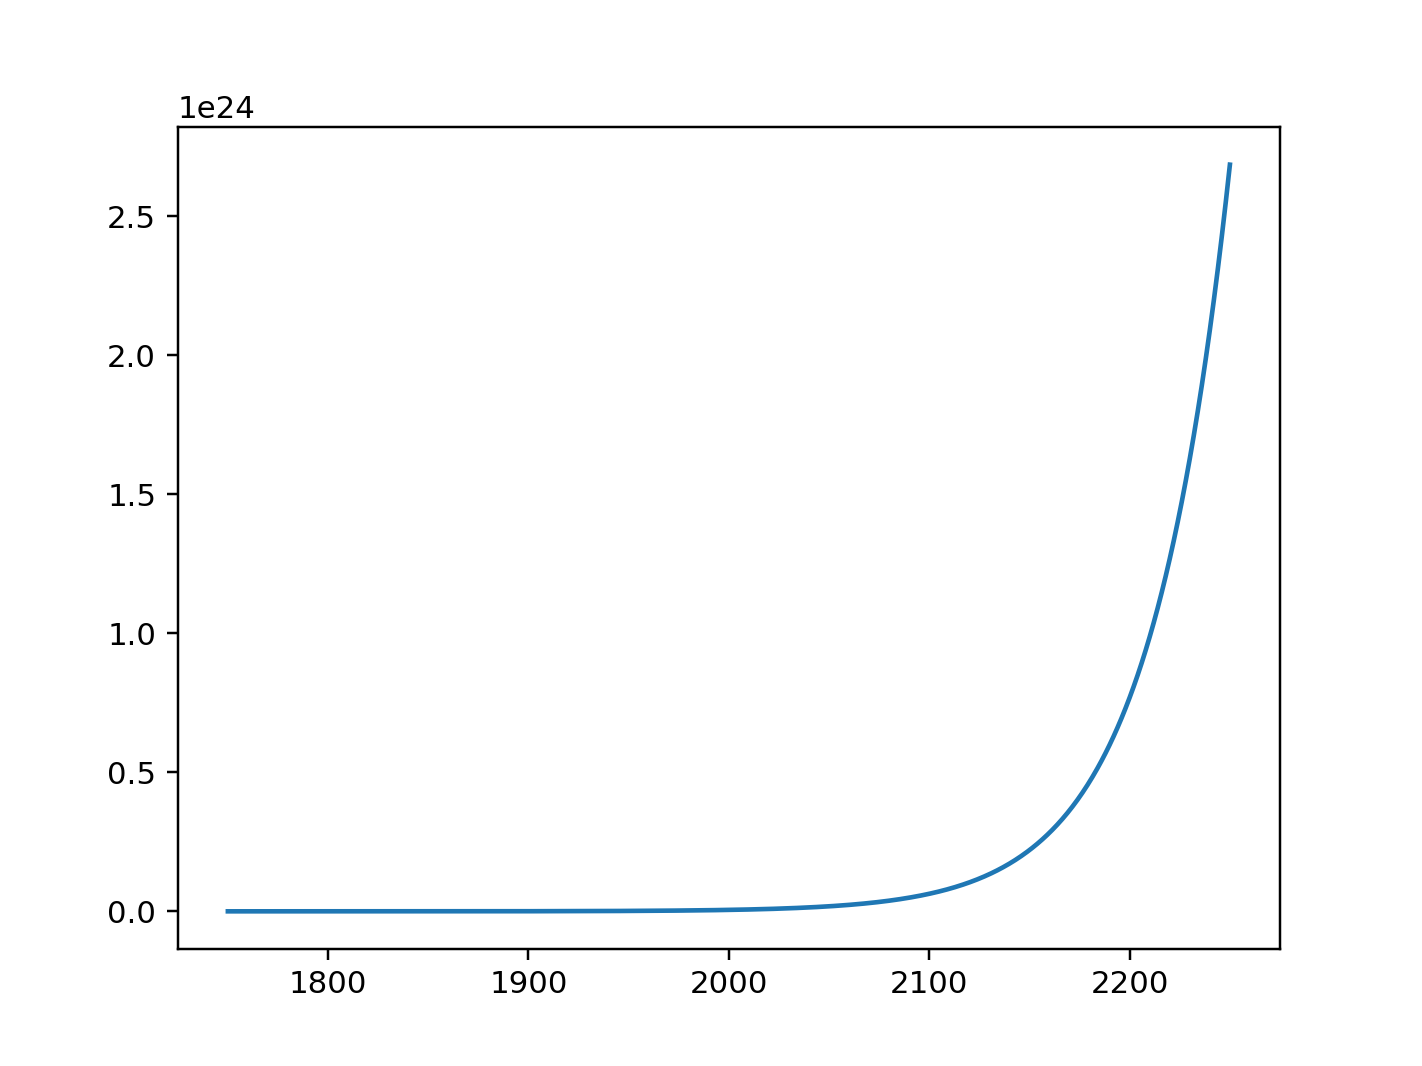

In [6]:
### BEGIN SOLUTION
myexp = np.exp(k*t)
plt.figure()
plt.plot()
plt.plot(t,myexp)
### END SOLUTION

### The next few cells create a function and test it. 
We'll start with a sigmoid function that steps _up_.

In [7]:
# Define a step-up sigmoid function (from zero to 1) 
def sigmaup(t,transitiontime,transitiontimeinterval):
  # Generates a sigmoid (smooth step-up) function
  return 1 / (1 + np.exp(-(t-transitiontime)*3/transitiontimeinterval))

<IPython.core.display.Javascript object>


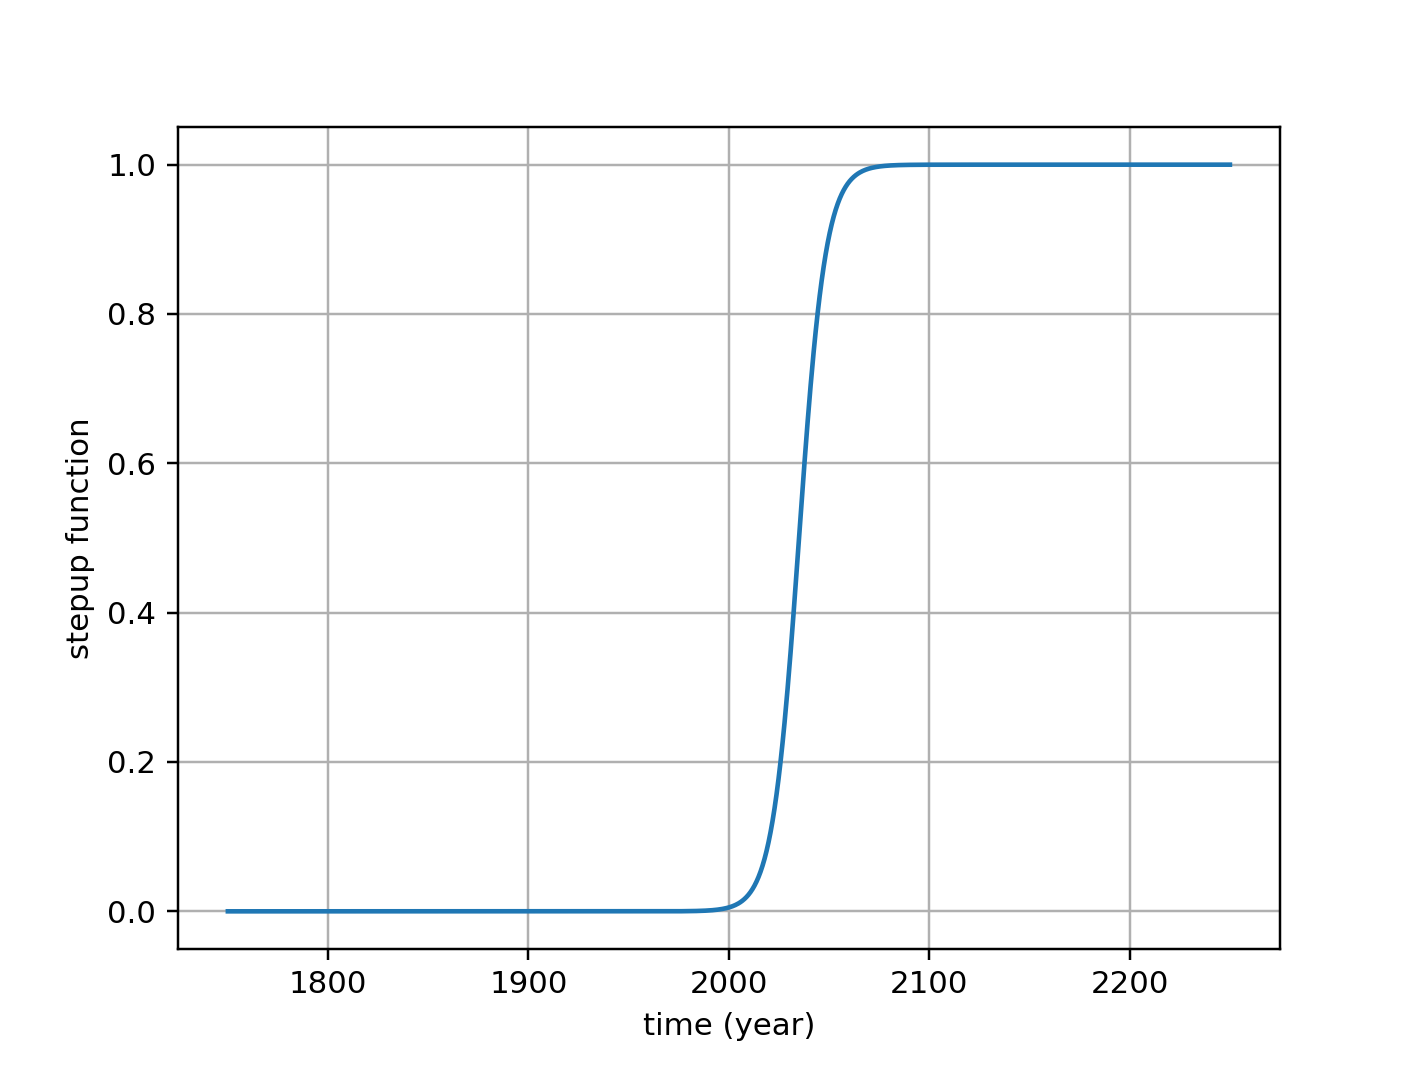

In [8]:
# Using the parameters laid out at the start of this notebook ...
mysigmaup = sigmaup(t,t_trans,delta_t_trans)

# Graph the result
plt.figure()
plt.plot(t,mysigmaup)
plt.xlabel('time (year)')
plt.ylabel('stepup function')
plt.grid()

### Your turn
Now write (and test) a step-down function. It should be called "sigmadown", and take the same arguments as sigmaup does.

In [9]:
### BEGIN SOLUTION 
# Define a step-down sigmoid function (from 1 to 0) 
def sigmadown(t,transitiontime,transitiontimeinterval):
  # Generates a sigmoid (smooth step-down) function
  return 1 - sigmaup(t,transitiontime,transitiontimeinterval)
### END SOLUTION

<IPython.core.display.Javascript object>


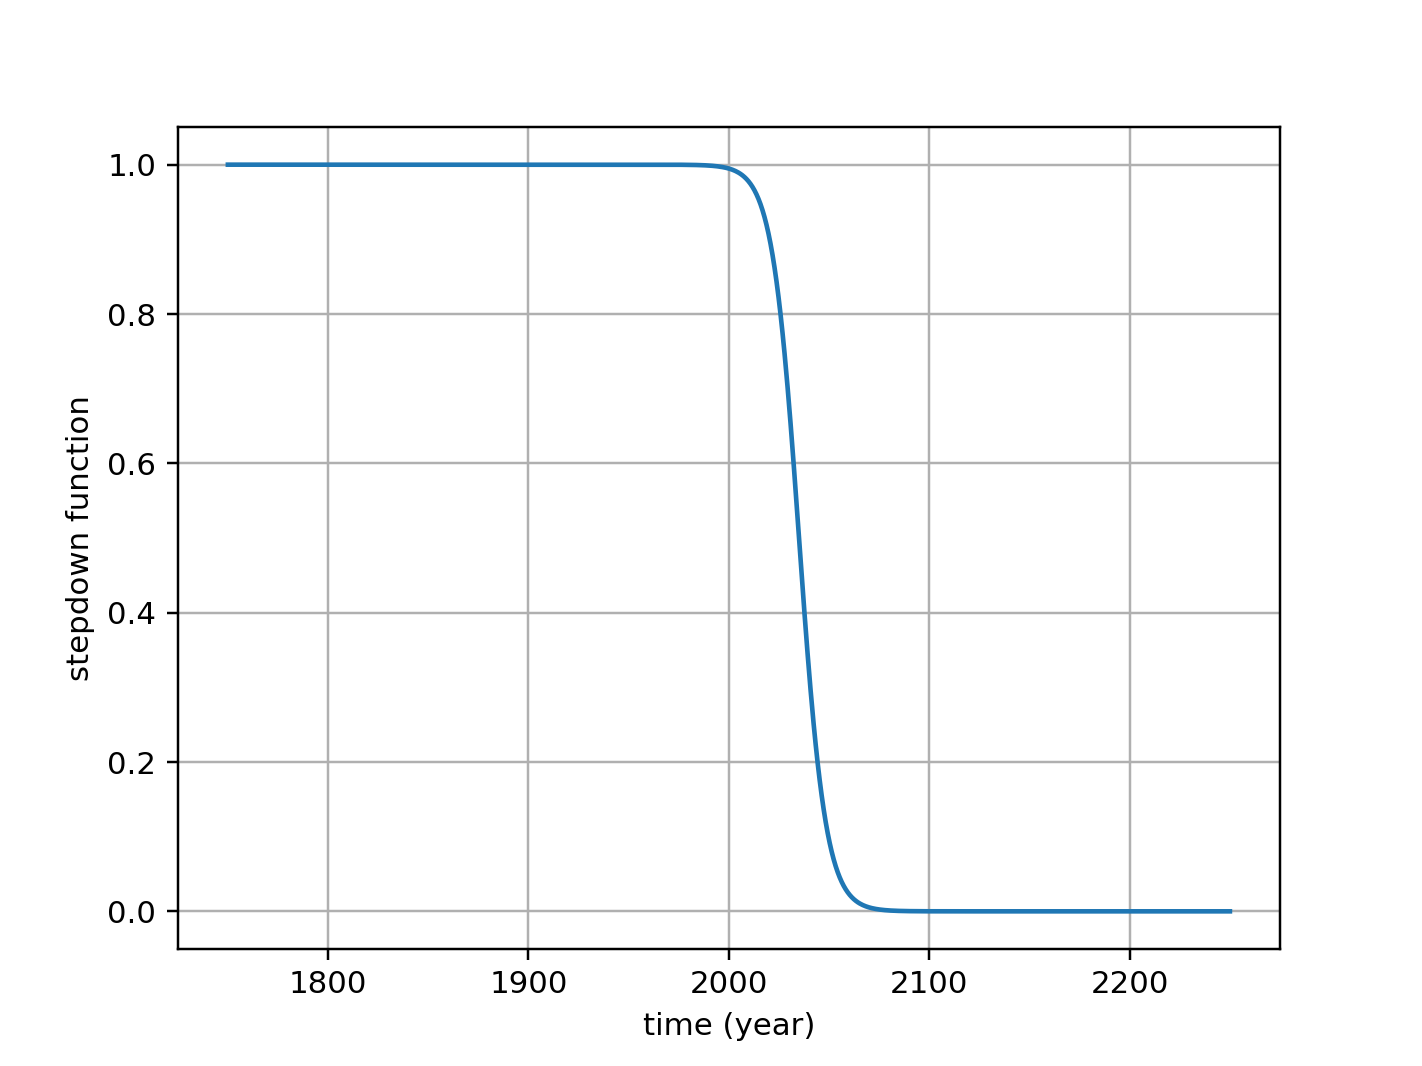

In [10]:
### BEGIN SOLUTION 
mysigmadown = sigmadown(t,t_trans,delta_t_trans)

# Graph the result
plt.figure()
plt.plot(t,mysigmadown)
plt.xlabel('time (year)')
plt.ylabel('stepdown function')
plt.grid()
### END SOLUTION

### Pause for analysis
Take a moment to study the graph you just produced, and provide brief answers to the following questions in the cell below: 
1. This is about the 80/20 rule: In what year is the transition 20% under way? 80%? How many years separate these two?
2. Change $t_{trans}$ and $\Delta t_{trans}$ (and then use Cell/Run All Above). Does the curve change appropriately?

### Getting $N$
Now we're ready to calculate $N$. Do so in the cell below (and call the variable "myN"). Don't forget that in evaluating the denominator of Eq. (2), the exponent function and the sigmoid function should take $t_o$ instead of $t$. If you've done things right, you should get a really small scalar, like on the order of $10^{-21}$.

In [11]:
### BEGIN SOLUTION
myN = eps_0/(np.exp(k*t_0)*sigmadown(t_0,t_trans,delta_t_trans))
### END SOLUTION

print(myN)

1.810405478405009e-21


### Your turn: putting it all together
In the cell below, construct your emissions schedule according to Eq. (1), calling the resulting array "myeps". Then plot myeps as a function of time.

<IPython.core.display.Javascript object>


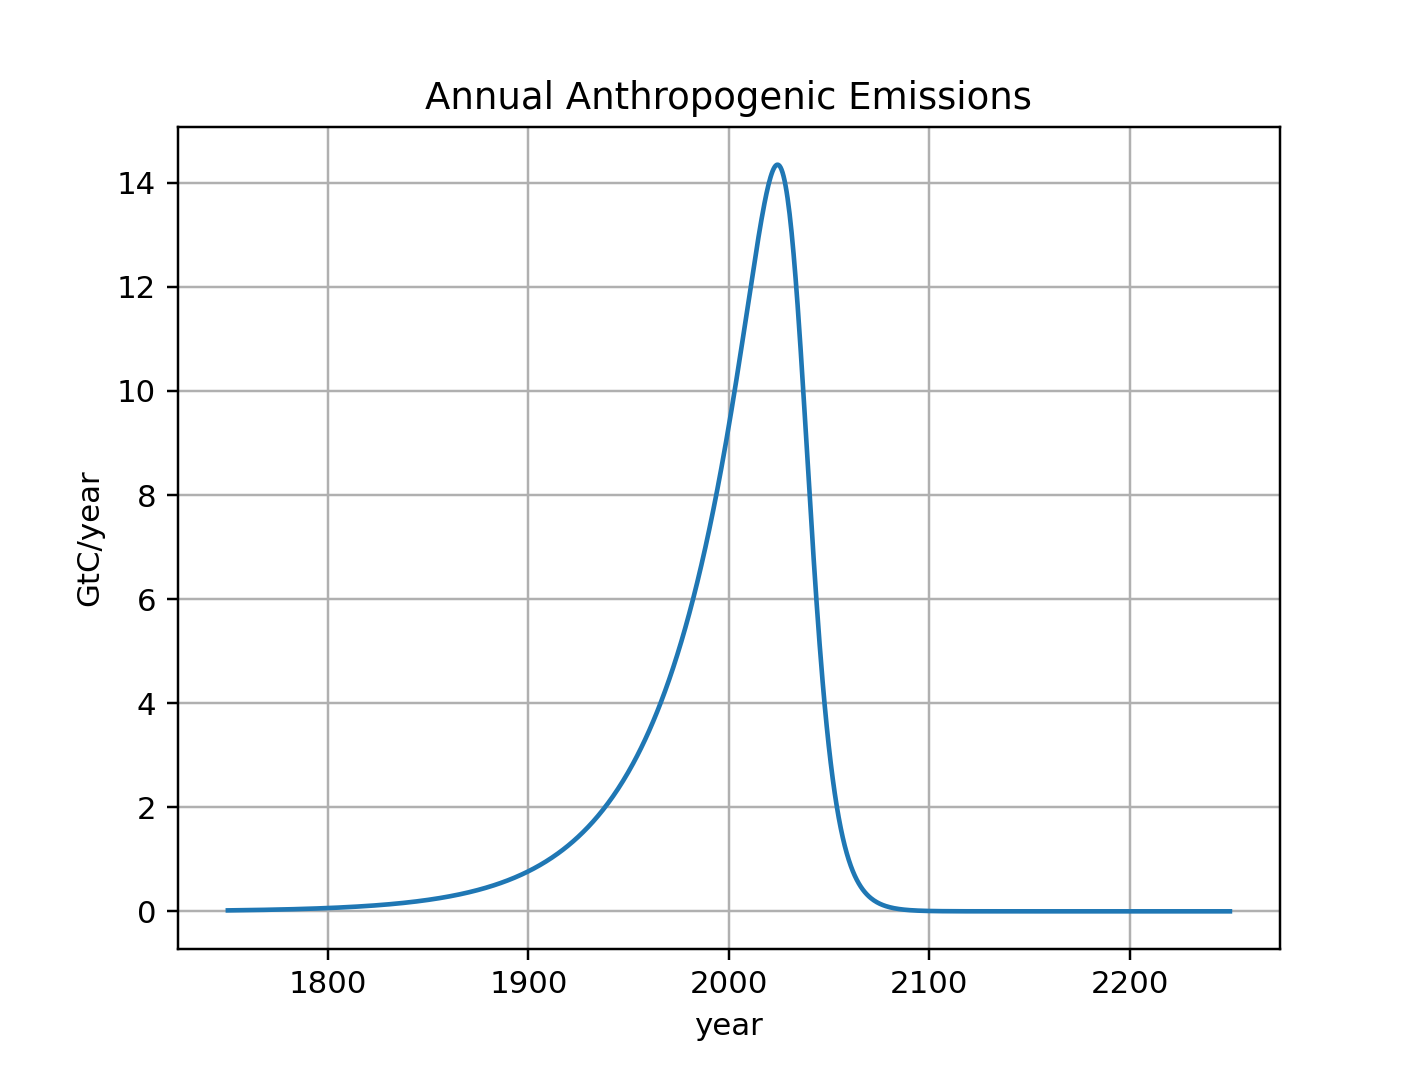

Text(0, 0.5, 'GtC/year')

In [12]:
### BEGIN SOLUTION
# Implementing Eq. (1)
myeps = myN*myexp*mysigmadown

plt.figure()
plt.plot(t,myeps)
plt.grid(True)
plt.title('Annual Anthropogenic Emissions')
plt.xlabel('year')
plt.ylabel('GtC/year')
### END SOLUTION

### Pause for analysis
Take a moment to study the graph you just produced. In what year did emissions peak? Was it sooner or later than the transition year, $t_{trans}$? What's the time difference between the year emissions peaked, and the transition year? 

At this point, you might want to revise some of your parameters. Going on, we'll want an emissions scenario that captures what looks like _all_ the anthropogenic emissions -- which means you should probably make t_start closer to 1800, or even earlier. There's also good evidence that the impacts of emissions will be felt after the year 2100 -- which means you should probably make t_stop closer to 2200, or even later.

So, revise the parameters in the "Parameters" accordingly, and use Cell/Run All Above before proceeding.

### Setting up your data with metadata for storage
The code below packages your results into a _Pandas_ dataframe. Why? Well, we want to save the data for use later, and _Pandas_ is a kind of industry standard. It's not quite enough, however, to store data: we really need to attach _metadata_ to these data. Metadata include things like the units of our data, and also parameters like the growth rate, the transition year, etc.

As you can see from the example below, we do this by creating a bigger structure -- a _dictionary_. A dictionary has the capability of holding lots of different pieces -- called _elements_ -- of various different sizes and shapes. One element of the dictionary is the entire _Pandas_ dataframe. 

In [13]:
# Create an empty dataframe
epsdf = pd.DataFrame()

# Insert the time and emissions columns into the dataframe
epsdf.insert(loc=0, column='time', value=t)
epsdf.insert(loc=1, column='emissions', value=myeps)

# Create an empty dictionary
epsdictionary = dict()

# Add in our dataframe
epsdictionary['dataframe']=epsdf

# Let's see what we have in this dictionary
display(epsdictionary)

{'dataframe':             time     emissions
 0    1750.000000  1.812005e-02
 1    1750.500501  1.834820e-02
 2    1751.001001  1.857923e-02
 3    1751.501502  1.881316e-02
 4    1752.002002  1.905004e-02
 ..           ...           ...
 995  2247.997998  6.161628e-11
 996  2248.498498  5.823263e-11
 997  2248.998999  5.475399e-11
 998  2249.499499  5.117853e-11
 999  2250.000000  4.750435e-11
 
 [1000 rows x 2 columns]}

### Adding in metadata as elements of our dictionary
The first two lines of the cell below add two elements of metadata to our dictionary.

In [14]:
epsdictionary['emission units']='GtC/year'
epsdictionary['k']=k

# Let's see what we have in this dictionary now
display(epsdictionary)

{'dataframe':             time     emissions
 0    1750.000000  1.812005e-02
 1    1750.500501  1.834820e-02
 2    1751.001001  1.857923e-02
 3    1751.501502  1.881316e-02
 4    1752.002002  1.905004e-02
 ..           ...           ...
 995  2247.997998  6.161628e-11
 996  2248.498498  5.823263e-11
 997  2248.998999  5.475399e-11
 998  2249.499499  5.117853e-11
 999  2250.000000  4.750435e-11
 
 [1000 rows x 2 columns],
 'emission units': 'GtC/year',
 'k': 0.025}

### Your turn
Add a few more elements of metadata to our dictionary.

In [15]:
### BEGIN SOLUTION
epsdictionary['t_0'] = t_0
epsdictionary['eps_0'] = eps_0
epsdictionary['t_trans'] = t_trans
epsdictionary['delta_t_trans'] = delta_t_trans
### END SOLUTION


# Let's see what we have in this dictionary now
display(epsdictionary)

{'dataframe':             time     emissions
 0    1750.000000  1.812005e-02
 1    1750.500501  1.834820e-02
 2    1751.001001  1.857923e-02
 3    1751.501502  1.881316e-02
 4    1752.002002  1.905004e-02
 ..           ...           ...
 995  2247.997998  6.161628e-11
 996  2248.498498  5.823263e-11
 997  2248.998999  5.475399e-11
 998  2249.499499  5.117853e-11
 999  2250.000000  4.750435e-11
 
 [1000 rows x 2 columns],
 'emission units': 'GtC/year',
 'k': 0.025,
 't_0': 2020,
 'eps_0': 14,
 't_trans': 2035,
 'delta_t_trans': 20}

### Saving your emissions scenario
The cell below saves your emissions scenario (the entire dictionary -- data and metadata) as a file. You might want to modify the filename to something more meaningful, especially if you plan on save multiple scenarios.

In [16]:
# Decide on a name for the file
filename = 'Scenario1.hdf5'

# Save our data + metadata dictionary as that file
h5io.write_hdf5(filename, epsdictionary, overwrite=True)

### Double-checking
It's often nice to double-check that you really did save what you thought you did. The cell below will load the file you just saved and print out some information about it.

In [17]:
# This loads the stored dictionary
epsdictionary_fromfile = h5io.read_hdf5(filename)

# This shows what's in it
display(epsdictionary_fromfile)

{'dataframe':             time     emissions
 0    1750.000000  1.812005e-02
 1    1750.500501  1.834820e-02
 2    1751.001001  1.857923e-02
 3    1751.501502  1.881316e-02
 4    1752.002002  1.905004e-02
 ..           ...           ...
 995  2247.997998  6.161628e-11
 996  2248.498498  5.823263e-11
 997  2248.998999  5.475399e-11
 998  2249.499499  5.117853e-11
 999  2250.000000  4.750435e-11
 
 [1000 rows x 2 columns],
 'delta_t_trans': 20,
 'emission units': 'GtC/year',
 'eps_0': 14,
 'k': 0.025,
 't_0': 2020,
 't_trans': 2035}

### Refresh/save/validate
Almost done! To double-check everything is OK, repeat the "Three steps for refreshing and saving your code," and press the "Validate" button (as usual).

### Close/submit/logout
1. Close this notebook using the "File/Close and Halt" dropdown menu
1. Using the Assignments tab, submit this notebook
1. Press the Logout tab of the Home Page